<a href="https://colab.research.google.com/github/aaroncantu22/CSCI164AIProjects/blob/main/CSCI164_Lymphography_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imbalanced-learn --quiet  # Only needed once per session
!pip install --upgrade scikit-learn --quiet  # Optional: ensure latest version
!pip install pandas scikit-learn imbalanced-learn matplotlib

In [ ]:
# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/lymphography/lymphography.data"
df = pd.read_csv(url, header=None)

In [ ]:
# Load all libraries first (keep them tidy!)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [ ]:
# Load Lymphography dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/lymphography/lymphography.data"
df = pd.read_csv(url, header=None)

# Add column names (from UCI description)
columns = [
    'lymphatics', 'block_of_affere', 'bl_of_lymph_c', 'bl_of_lymph_s', 'by_pass',
    'extravasates', 'regeneration_of', 'early_uptake_in', 'lym_nodes_dimin',
    'lym_nodes_enlar', 'changes_in_lym', 'defect_in_node', 'changes_in_node',
    'changes_in_stru', 'special_forms', 'dislocation_of', 'exclusion_of_no',
    'no_of_nodes_in', 'target'
]
df.columns = columns

# Show the first 5 rows
df.head()

,lymphatics,block_of_affere,bl_of_lymph_c,bl_of_lymph_s,by_pass,extravasates,regeneration_of,early_uptake_in,lym_nodes_dimin,lym_nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no_of_nodes_in,target
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train Random Forest with class weighting
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Penalizes misclassification of rare classes
    random_state=42
)
rf.fit(X_train, y_train)  # Use original (imbalanced) training data

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Handles unseen classes

Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.89      0.67         9
           2       0.33      0.33      0.33         6
           3       0.50      0.25      0.33         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         0

    accuracy                           0.37        30
   macro avg       0.17      0.18      0.17        30
weighted avg       0.29      0.37      0.31        30



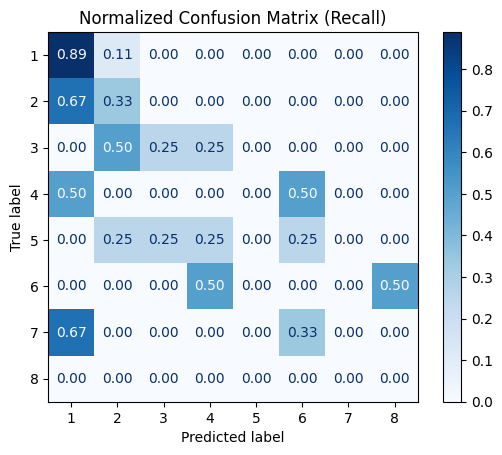

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get unique classes in y_test and y_pred
classes = sorted(set(y_test).union(set(y_pred)))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classes, normalize='true')

# Plot with aligned labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', values_format='.2f')  # Show proportions with 2 decimals
plt.title("Normalized Confusion Matrix (Recall)")
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=3,
    scoring='f1_weighted'
)
grid.fit(X_train, y_train)  # Use original (unresampled) data with class_weight

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_weighted')